In [28]:
## PCA on Sleep data from SM

In [29]:
%matplotlib inline

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')
from thunder import Colorize
image = Colorize.image

In [31]:
import os.path as pth
imagepath = pth.join(pth.dirname(pth.realpath(thunder.__file__)), '/Users/ARGO/Downloads/Examples For Processing /SLEEP01.tif')

In [32]:
data = tsc.loadImages(imagepath, inputFormat='tif-stack', nplanes = 1)

In [33]:
data.nrecords

288

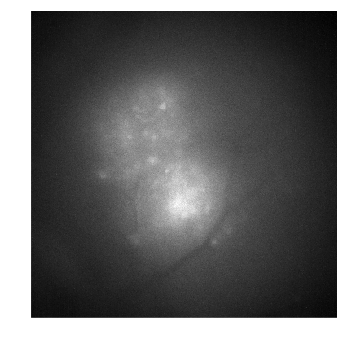

In [9]:
img = data.stdev()
image(img[:])

In [34]:
data.cache()
data.count();

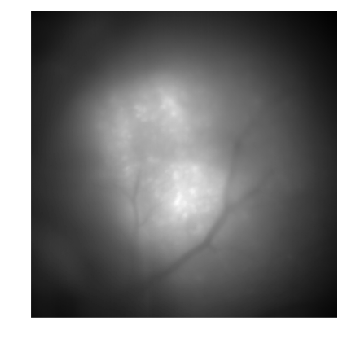

In [11]:
# look at the mean image
im = data.mean()
image(im[:])

In [35]:
ts = data.toTimeSeries()

In [36]:
# Run PCA with three components

from thunder import PCA
model = PCA(k=4).fit(ts)

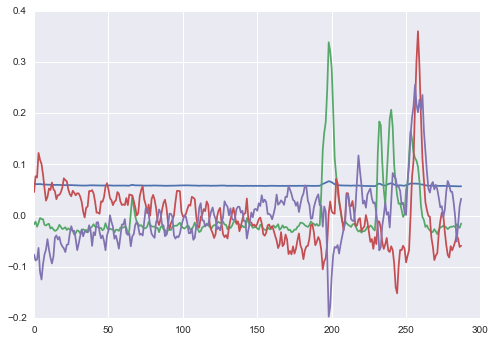

In [37]:
plt.plot(model.comps.T);

In [38]:

model.comps.shape


(4, 288)

In [39]:
gg = model.comps[1:,160:]
gg.shape

(3, 128)

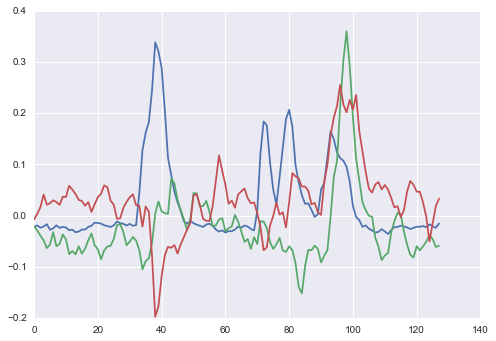

In [40]:
plt.plot(gg.T);

In [42]:
# The scores are spatial basis functions. 
# We can pack them into a local array and look at them as images one by one.

imgs = model.scores.pack()
imgs.shape

(4, 377, 376)

In [43]:
Last3 = imgs[1:,:,:]
Last3.shape


(3, 377, 376)

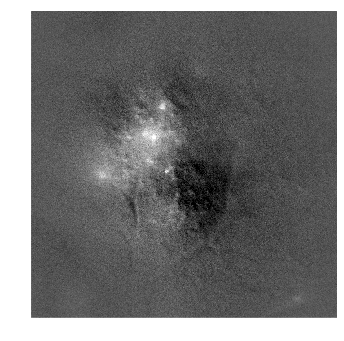

In [44]:
image(imgs[2,:,:], clim=(-0.01,0.02))

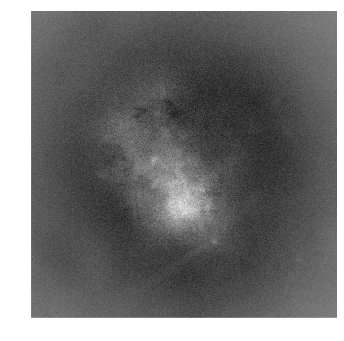

In [51]:
image(imgs[1,:,:], clim=(-0.01,0.02))

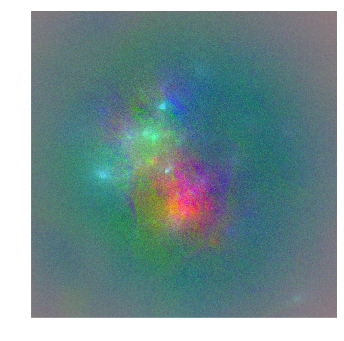

In [51]:
from numpy import amax
sns.set_context('notebook')
maps = Colorize(cmap='rgb', scale=1.1).transform(Last3)
image(maps,2)

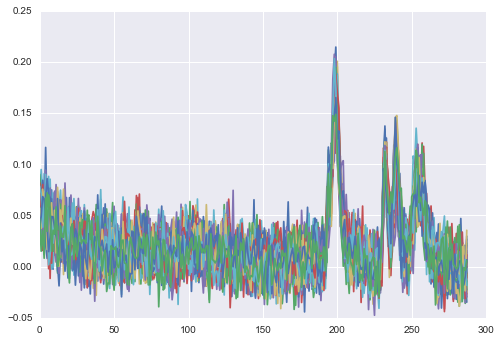

In [19]:
## Take a subset of pixels, and plot them 
examples = data.toTimeSeries().normalize().subset(50, thresh=0.03)
sns.set_style('darkgrid')
plt.plot(examples.T);

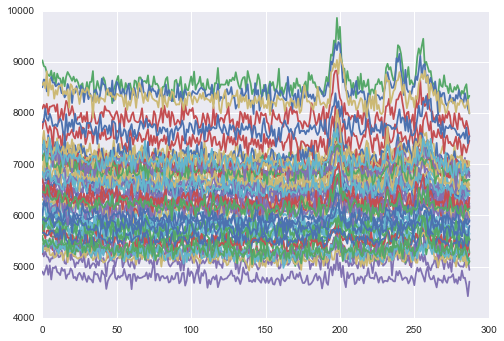

In [26]:
## Take a subset of pixels, and plot them 
# ts is the timsereis, we defiend earlier
examples = ts.subset(nsamples=50, thresh=100)
plt.plot(examples.T); #  [0:20,:]);